In [168]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='AppleGothic')
import warnings
warnings.filterwarnings(action='ignore')

df_raw=pd.read_csv('../data/raw_data/train.csv')
df=df_raw.copy()

sample_submission_raw=pd.read_csv('../data/raw_data/sample_submission.csv')
sample_submission=sample_submission_raw.copy()

In [169]:
df['일시']=pd.to_datetime(df['일시'],format="%Y%m%d")
df.set_index('일시',inplace=True)

df['일'] = df.index.day
df['월'] = df.index.month
df['년'] = df.index.year
df['요일']=df.index.day_of_week
df['주']=df.index.week

df['주말평일'] = df['요일'].apply(lambda x: '평일' if x < 5 else '주말')

# --

sample_submission['일시']=pd.to_datetime(sample_submission['일시'],format="%Y%m%d")
sample_submission.set_index('일시',inplace=True)

sample_submission['일'] = sample_submission.index.day
sample_submission['월'] = sample_submission.index.month
sample_submission['년'] = sample_submission.index.year
sample_submission['요일']=sample_submission.index.day_of_week
sample_submission['주']=sample_submission.index.week

sample_submission['주말평일'] = sample_submission['요일'].apply(lambda x: '평일' if x < 5 else '주말')

In [170]:
from pytimekr import pytimekr
def get_holiday(_year):
    holidays=[]
    for holiday in pytimekr.holidays(year=_year):
        if pytimekr.red_days(holiday) != None:
            ans = [i.strftime("%Y-%m-%d") for i in pytimekr.red_days(holiday)]
            holidays.extend(ans)
        else:
            ans=holiday.strftime("%Y-%m-%d")
            holidays.append(ans)
    return list(set(holidays))

In [171]:
df.loc[get_holiday(2018),'주말평일'] = '주말'
df.loc[get_holiday(2019),'주말평일'] = '주말'
df.loc[get_holiday(2020),'주말평일'] = '주말'
df.loc[get_holiday(2021),'주말평일'] = '주말'
sample_submission.loc[sorted(get_holiday(2022))[:-1],'주말평일'] ='주말'

In [172]:
df.iloc[:,:-1]

,광진구,동대문구,성동구,중랑구,일,월,년,요일,주
일시,,,,,,,,,
2018-01-01,0.592,0.368,0.580,0.162,1,1,2018,0,1
2018-01-02,0.840,0.614,1.034,0.260,2,1,2018,1,1
2018-01-03,0.828,0.576,0.952,0.288,3,1,2018,2,1
2018-01-04,0.792,0.542,0.914,0.292,4,1,2018,3,1
2018-01-05,0.818,0.602,0.994,0.308,5,1,2018,4,1
...,...,...,...,...,...,...,...,...,...
2021-12-27,3.830,3.416,2.908,2.350,27,12,2021,0,52
2021-12-28,4.510,3.890,3.714,2.700,28,12,2021,1,52
2021-12-29,4.490,3.524,3.660,2.524,29,12,2021,2,52


In [173]:
df_mms = df.iloc[:,:-1].copy()

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_mms.iloc[:,:]=mms.fit_transform(df.iloc[:,:-1])

In [174]:
df

,광진구,동대문구,성동구,중랑구,일,월,년,요일,주,주말평일
일시,,,,,,,,,,
2018-01-01,0.592,0.368,0.580,0.162,1,1,2018,0,1,주말
2018-01-02,0.840,0.614,1.034,0.260,2,1,2018,1,1,평일
2018-01-03,0.828,0.576,0.952,0.288,3,1,2018,2,1,평일
2018-01-04,0.792,0.542,0.914,0.292,4,1,2018,3,1,평일
2018-01-05,0.818,0.602,0.994,0.308,5,1,2018,4,1,평일
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,3.830,3.416,2.908,2.350,27,12,2021,0,52,평일
2021-12-28,4.510,3.890,3.714,2.700,28,12,2021,1,52,평일
2021-12-29,4.490,3.524,3.660,2.524,29,12,2021,2,52,평일


<AxesSubplot: xlabel='주'>

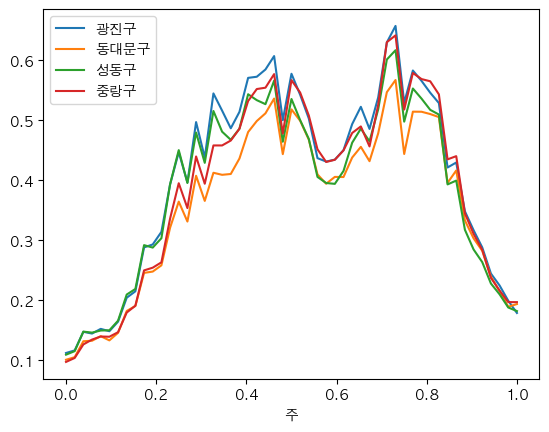

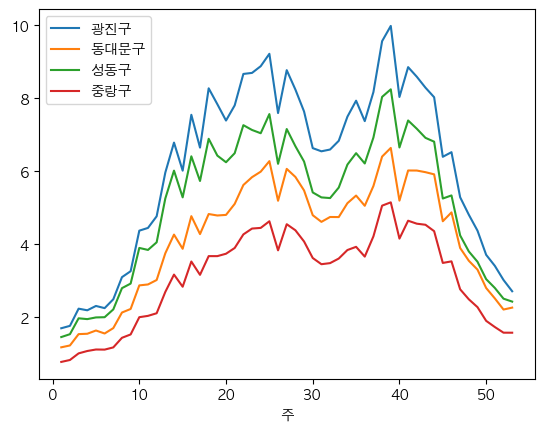

In [175]:
df_mms.groupby('주')[df_mms.columns[:4]].mean().plot()
df.groupby('주')[df.columns[:4]].mean().plot()

In [176]:
df_2018 = df[df.index.year == 2018]
df_2019 = df[df.index.year == 2019]
df_2020 = df[df.index.year == 2020]
df_2021 = df[df.index.year == 2021]

In [177]:
df_2018_w=df_2018.iloc[:,:-1].groupby('주').mean().iloc[:,:4]
df_2019_w=df_2019.iloc[:,:-1].groupby('주').mean().iloc[:,:4]
df_2020_w=df_2020.iloc[:,:-1].groupby('주').mean().iloc[:,:4]
df_2021_w=df_2021.iloc[:,:-1].groupby('주').mean().iloc[:,:4]

In [178]:
df_2018_w.columns = [str(i)+'2018' for i in df_2018_w.columns]
df_2019_w.columns = [str(i)+'2019' for i in df_2019_w.columns]
df_2020_w.columns = [str(i)+'2020' for i in df_2020_w.columns]
df_2021_w.columns = [str(i)+'2021' for i in df_2021_w.columns]

In [179]:
my_df=pd.concat([df_2018_w, df_2019_w, df_2020_w, df_2021_w],axis=1)
my_df.loc[:,[i  for i in my_df.columns if i.startswith('광진구')]].diff(axis=1).fillna(0).mean(axis=1)
my_df.loc[:,[i  for i in my_df.columns if i.startswith('동대문구')]].diff(axis=1).fillna(0).mean(axis=1)
my_df.loc[:,[i  for i in my_df.columns if i.startswith('성동구')]].diff(axis=1).fillna(0).mean(axis=1)
my_df.loc[:,[i  for i in my_df.columns if i.startswith('중랑구')]].diff(axis=1).fillna(0).mean(axis=1)

주
1     0.153911
2     0.277286
3     0.377786
4     0.466214
5     0.454786
6     0.571786
7     0.509500
8     0.735286
9     0.675786
10    0.883000
11    0.829786
12    0.826571
13    0.976857
14    1.302714
15    0.863143
16    1.281786
17    0.984500
18    0.963143
19    0.911929
20    1.110786
21    0.842429
22    1.006357
23    1.008643
24    1.052143
25    1.043786
26    0.921571
27    1.081357
28    1.102286
29    0.952071
30    0.908071
31    1.117714
32    1.228857
33    0.974429
34    0.817857
35    1.256000
36    0.886071
37    1.191286
38    1.137571
39    0.885286
40    0.606786
41    0.996500
42    0.812500
43    1.100929
44    1.155000
45    0.629429
46    0.851143
47    0.698143
48    0.495071
49    0.802143
50    0.471143
51    0.468714
52    0.448800
53   -0.117292
dtype: float64

In [180]:
my_temp=df.groupby(['주','주말평일'])[df.columns[:4]].mean()
my_temp=my_temp.reset_index()

In [181]:
my_temp

,주,주말평일,광진구,동대문구,성동구,중랑구
0,1,주말,1.446364,0.970182,1.088364,0.676364
1,1,평일,1.870000,1.318000,1.704118,0.848941
2,2,주말,1.692500,1.194250,1.279250,0.857500
3,2,평일,1.799600,1.247200,1.645400,0.824800
4,3,주말,2.351000,1.596500,2.013250,1.167250
...,...,...,...,...,...,...
101,51,평일,3.880800,2.910100,3.299800,1.959400
102,52,주말,2.419111,1.637111,1.940000,1.271333
103,52,평일,3.347647,2.522824,2.817412,1.746706
104,53,주말,2.016667,1.803333,1.769333,1.313333


In [182]:
sample_submission['주']=sample_submission['주'].apply(lambda x: 1 if x==52 else x)

In [183]:
temp=pd.merge(sample_submission,my_temp,on=['주말평일','주'])
my=temp.iloc[:,4:]
my=my.iloc[:,-4:]

In [184]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [185]:
for col in my.columns:
    my[col] = smooth(my[col],5)

In [162]:
temp=df_2021.iloc[:len(my),:4]

In [163]:
for col in temp.columns:
    temp[col] = smooth(temp[col],5)

<AxesSubplot: >

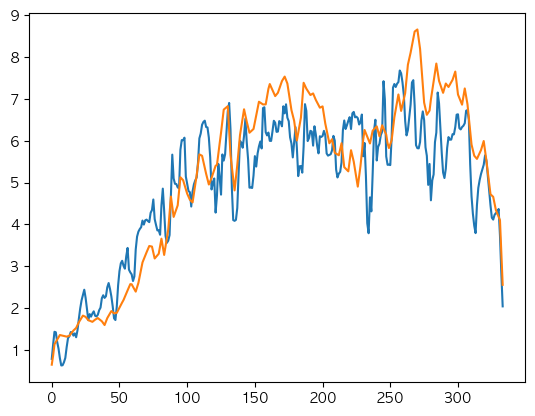

In [142]:
temp.reset_index(drop=True).iloc[:,3].plot()
(my.iloc[:,3]*1.6).plot()

In [154]:
my_16=my.copy()
my_17=my.copy()

In [155]:
my_17.iloc[:,0]=my_17.iloc[:,0]*1.7
my_17.iloc[:,1]=my_17.iloc[:,1]*1.7
my_17.iloc[:,2]=my_17.iloc[:,2]*1.7
my_17.iloc[:,3]=my_17.iloc[:,3]*1.7

In [156]:
my_16.iloc[:,0]=my_16.iloc[:,0]*1.6
my_16.iloc[:,1]=my_16.iloc[:,1]*1.6
my_16.iloc[:,2]=my_16.iloc[:,2]*1.6
my_16.iloc[:,3]=my_16.iloc[:,3]*1.6

In [158]:
from sklearn.metrics import mean_absolute_error
dif=(mean_absolute_error(my_16.iloc[:,0],my_17.iloc[:,0]) + mean_absolute_error(my_16.iloc[:,1],my_17.iloc[:,1]) \
    +mean_absolute_error(my_16.iloc[:,2],my_17.iloc[:,2])+mean_absolute_error(my_16.iloc[:,3],my_17.iloc[:,3]))/4

In [164]:
my.iloc[:,0]=my.iloc[:,0]*1.65
my.iloc[:,1]=my.iloc[:,1]*1.65
my.iloc[:,2]=my.iloc[:,2]*1.65
my.iloc[:,3]=my.iloc[:,3]*1.65

<AxesSubplot: >

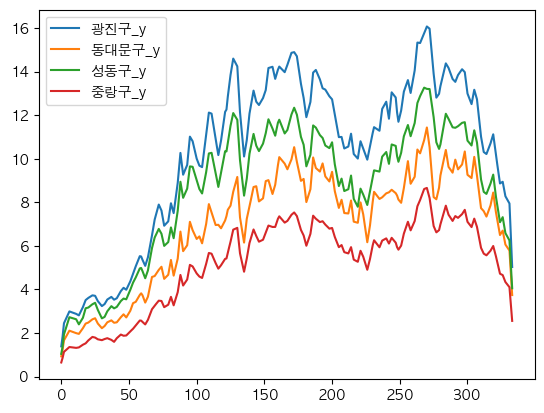

In [144]:
my.plot()

In [145]:
my_raw = my.copy()

In [165]:
for col in my.columns:
    my[col] = smooth(my[col],5)

In [166]:
sample_submission_raw.iloc[:,1:] = my.values

In [167]:
sample_submission_raw.to_csv('based_on_weekly_mean165.csv',index=False)

<AxesSubplot: >

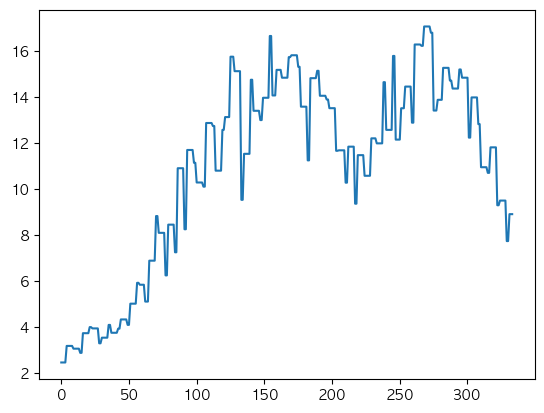

In [91]:
# (my.iloc[:,0]*1.7).plot()
# df_2021.reset_index(drop=True).iloc[:,0].plot()

# (my.iloc[:,1]*1.9).plot()
# df_2021.reset_index(drop=True).iloc[:,1].plot()

# (my.iloc[:,2]*1.7).plot()
# df_2021.reset_index(drop=True).iloc[:,2].plot()

# (my.iloc[:,3]*1.75).plot()
# df_2021.reset_index(drop=True).iloc[:,3].plot()

<AxesSubplot: >

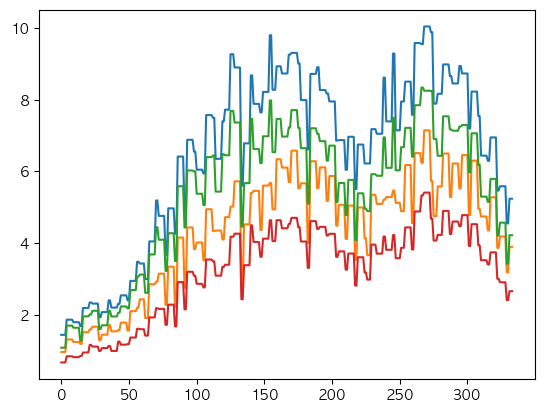

In [92]:
(my.iloc[:,0]).plot()
# df_2021.reset_index(drop=True).iloc[:,0].plot()

(my.iloc[:,1]).plot()
# df_2021.reset_index(drop=True).iloc[:,1].plot()

(my.iloc[:,2]).plot()
# df_2021.reset_index(drop=True).iloc[:,2].plot()

(my.iloc[:,3]).plot()
# df_2021.reset_index(drop=True).iloc[:,3].plot()